In [1]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import StandardScaler

In [2]:


# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Create a Pandas DataFrame from the dataset
data = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable to the DataFrame
data['target'] = housing.target

# 1. Normalize each feature using StandardScaler
scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])

# 2. Identify and drop extreme values (outliers)
# You can define a threshold to determine what is considered an extreme value.
# For example, you can use a z-score to detect outliers beyond a certain threshold.

threshold = 3  # Adjust this threshold as needed

# Calculate z-scores for each feature
z_scores = (data[data.columns[:-1]] - data[data.columns[:-1]].mean()) / data[data.columns[:-1]].std()

# Create a boolean mask for extreme values
outlier_mask = (z_scores.abs() < threshold).all(axis=1)

# Filter the DataFrame to remove rows with extreme values
data = data[outlier_mask]
data = data.reset_index(drop=True)

# Now, data contains the normalized features, and extreme values have been removed.


In [3]:
import sys
sys.path.append('..')
from xDL.models.NAM import NAM

In [4]:
nam = NAM(
    "target ~  -1 + CubicSplineNet(MedInc, n_knots=[8]) + CubicSplineNet(Latitude, n_knots=[8]) + CubicSplineNet(Longitude, n_knots=[8]) + CubicSplineNet(AveRooms, n_knots=[8])", 
    data=data, 
    feature_dropout=0.0001
    )

In [5]:
nam.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")

# Train the model
nam.fit(nam.training_dataset, epochs=150, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/150
16/16 [==============================] - 3s 31ms/step - loss: 3.6265 - val_loss: 1.7997
Epoch 2/150
16/16 [==============================] - 0s 11ms/step - loss: 1.5255 - val_loss: 1.3169
Epoch 3/150
16/16 [==============================] - 0s 10ms/step - loss: 1.2284 - val_loss: 1.0827
Epoch 4/150
16/16 [==============================] - 0s 13ms/step - loss: 1.0748 - val_loss: 1.0167
Epoch 5/150
16/16 [==============================] - 0s 11ms/step - loss: 1.0030 - val_loss: 0.9737
Epoch 6/150
16/16 [==============================] - 0s 11ms/step - loss: 0.9467 - val_loss: 0.9025
Epoch 7/150
16/16 [==============================] - 0s 9ms/step - loss: 0.9202 - val_loss: 0.9056
Epoch 8/150
16/16 [==============================] - 0s 11ms/step - loss: 0.8861 - val_loss: 0.8760
Epoch 9/150
16/16 [==============================] - 0s 10ms/step - loss: 0.8713 - val_loss: 0.8561
Epoch 10/150
16/16 [==============================] - 0s 12ms/step - loss: 0.8677 - val_loss: 0.8079


16/16 [==============================] - 1s 6ms/step


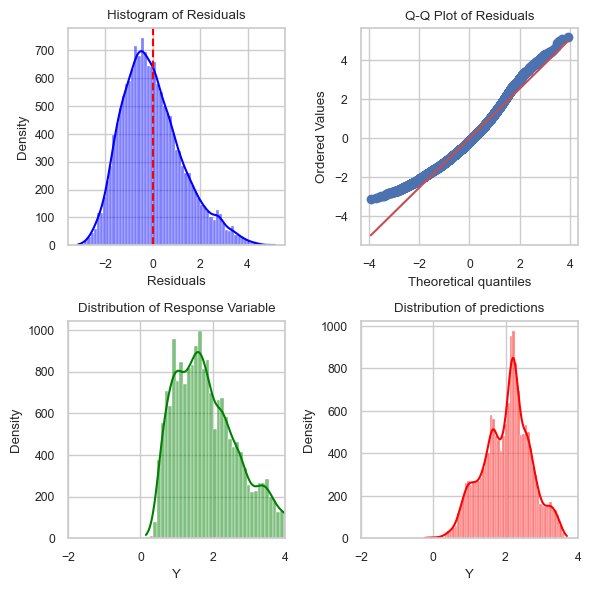

In [6]:
nam.analytics_plot()

In [7]:
nam.inputs

{'MedInc': <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'MedInc')>,
 'Latitude': <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'Latitude')>,
 'Longitude': <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'Longitude')>,
 'AveRooms': <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'AveRooms')>}

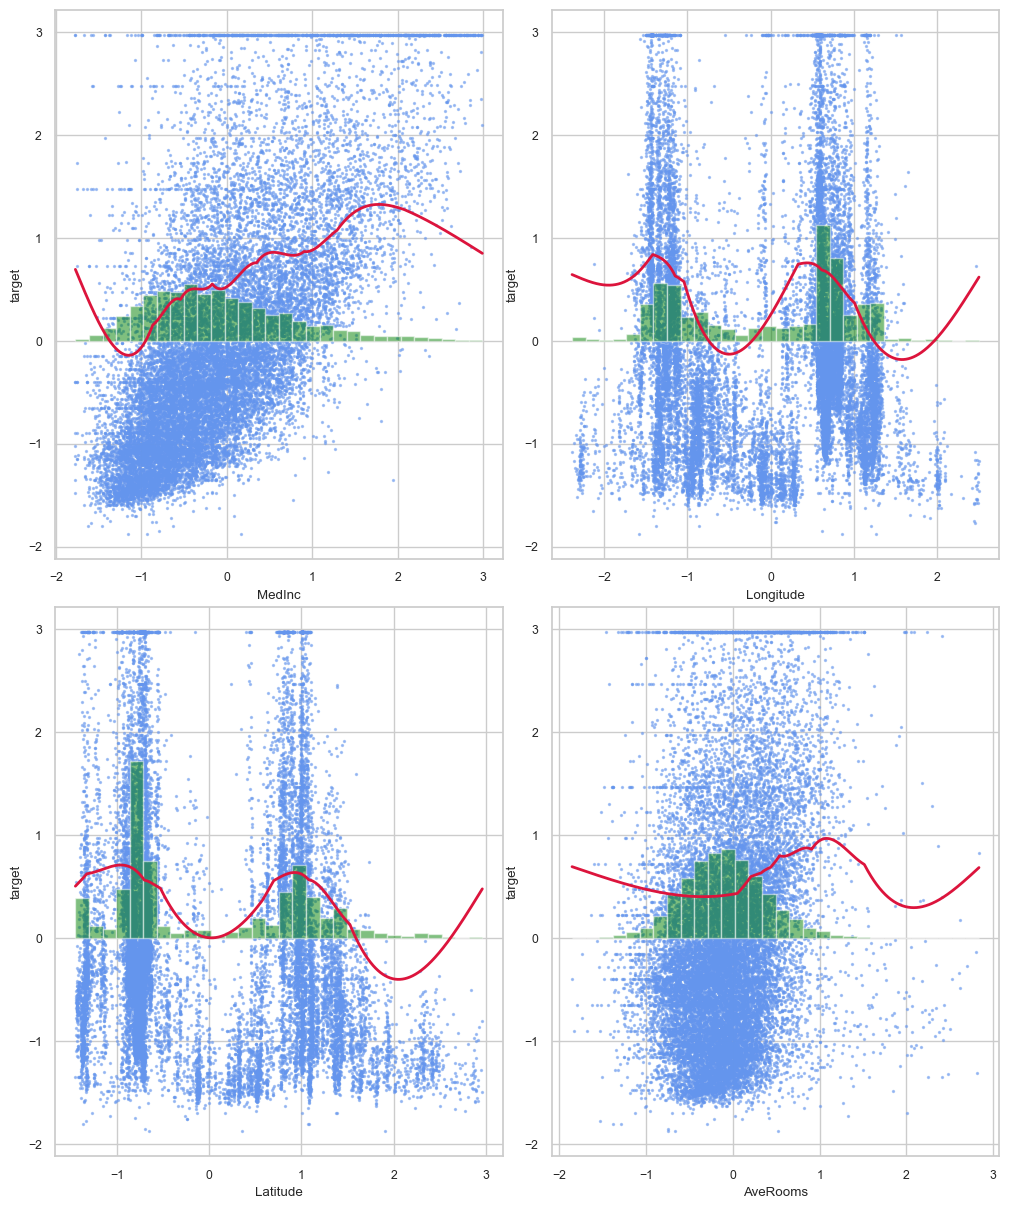

In [8]:
nam.plot()

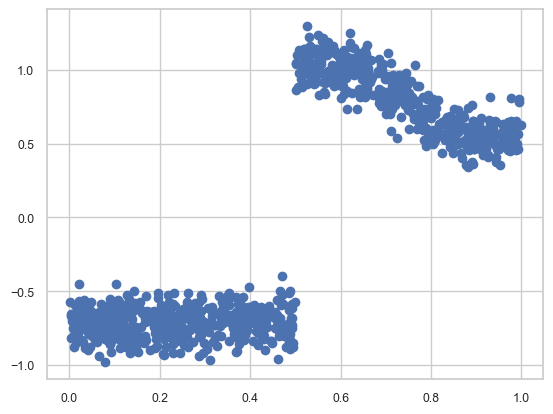

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    y = np.where(x<0.5,-1.5, 0.25*np.sin(x**2*np.pi**1.5))
    y += np.random.normal(0, 0.1, 1000)
    return y


x = np.random.rand(1000)

y = f(x)
y = y-np.mean(y)
plt.scatter(x, y)

In [10]:
data = pd.DataFrame({"Y":y, "X":x})

nam = NAM(
    "Y ~  -1 + CubicSplineNet(X, n_knots=[12])", 
    data=data, 
    feature_dropout=0.000
    )

In [11]:
nam.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

# Train the model
nam.fit(nam.training_dataset, epochs=550, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/550
1/1 [==============================] - 2s 2s/step - loss: 2.4458 - val_loss: 2.2077
Epoch 2/550
1/1 [==============================] - 0s 54ms/step - loss: 2.5097 - val_loss: 2.3891
Epoch 3/550
1/1 [==============================] - 0s 57ms/step - loss: 2.3398 - val_loss: 2.5456
Epoch 4/550
1/1 [==============================] - 0s 39ms/step - loss: 2.4392 - val_loss: 2.5733
Epoch 5/550
1/1 [==============================] - 0s 61ms/step - loss: 2.3914 - val_loss: 2.5522
Epoch 6/550
1/1 [==============================] - 0s 43ms/step - loss: 2.4318 - val_loss: 2.3905
Epoch 7/550
1/1 [==============================] - 0s 48ms/step - loss: 2.3676 - val_loss: 2.3233
Epoch 8/550
1/1 [==============================] - 0s 50ms/step - loss: 2.4200 - val_loss: 2.5714
Epoch 9/550
1/1 [==============================] - 0s 50ms/step - loss: 2.3362 - val_loss: 1.9898
Epoch 10/550
1/1 [==============================] - 0s 49ms/step - loss: 2.3168 - val_loss: 2.3670
Epoch 11/550
1/1 [===

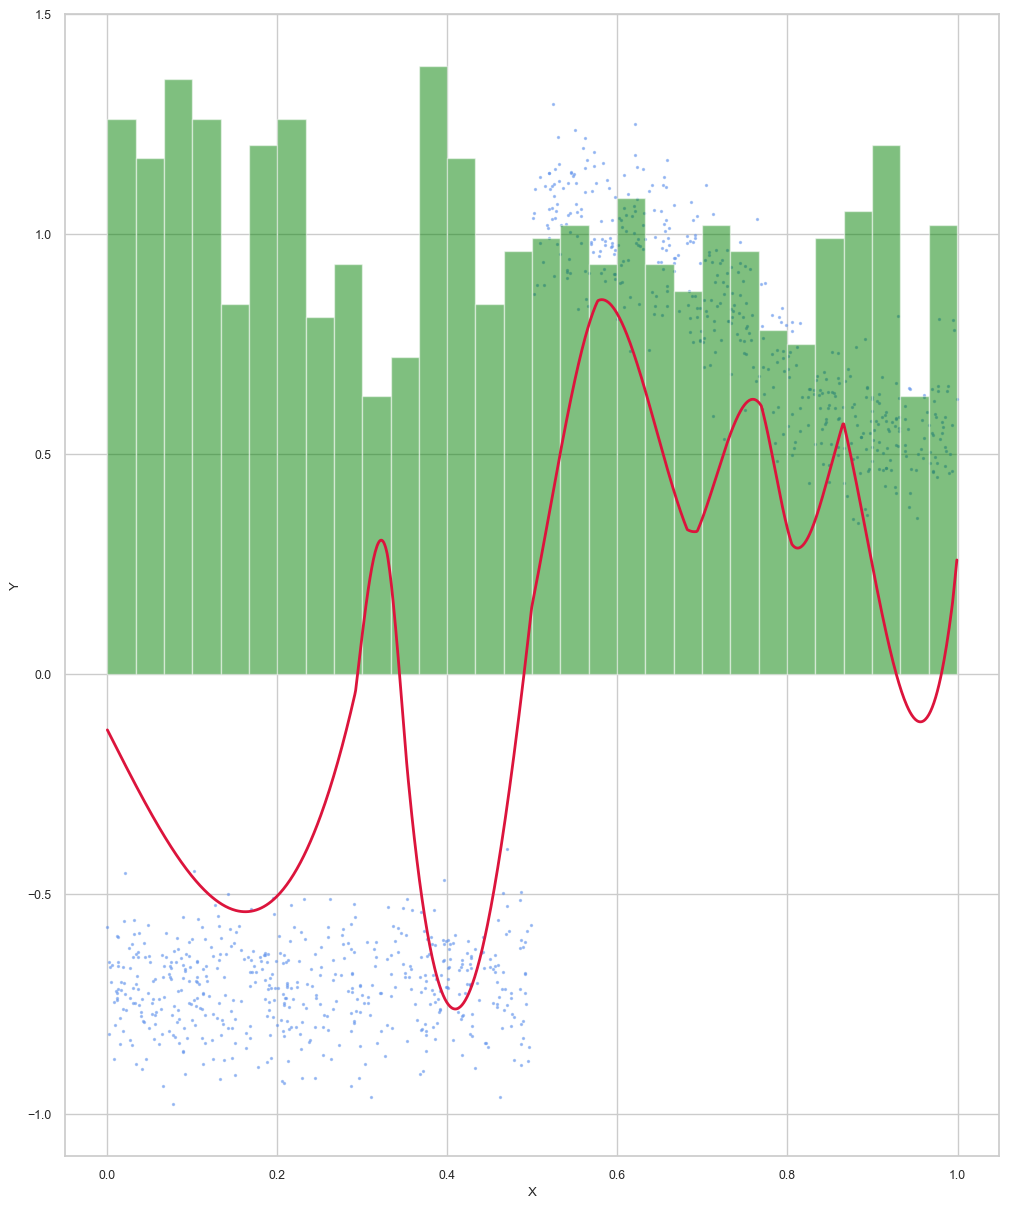

In [12]:
nam.plot()